In [27]:
import csv
import platform
import Models.process as process

import matplotlib.pyplot as plt
import numpy as np

In [53]:
def writeCSV(ax, dates, fileName):
    with open(fileName, mode='w', newline='') as file:
        writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        
        headerRow = list(dates.copy())
        headerRow.insert(0, "Label")
        writer.writerow(headerRow) #top row
        
        lines = ax.get_lines() #line data
        for line in lines:
            row = list(line.get_xdata())
            row.insert(0, line.get_label())
            
            writer.writerow(row)
        
        

In [5]:
pathc="../Data/State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")

filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

recovRaw = process.getRecov(infectRaw, deadRaw)
infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 40000000

skipDays = 0
numDays = 275 #from start to end of first wave
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

dates = dates[skipDays:numDays]

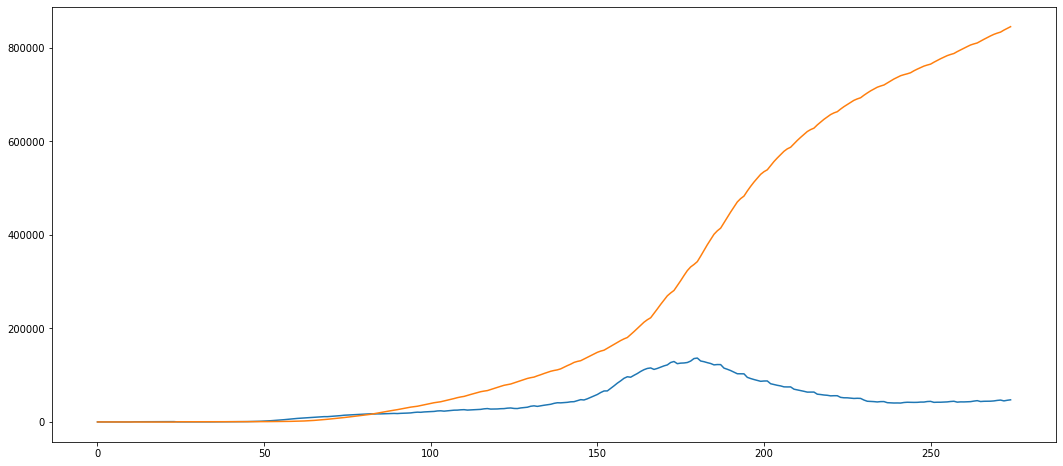

In [25]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infect, label="infect")
ax.plot(recov)

In [54]:
fileName = "..\\Figures\\CSVs\\test.csv"
writeCSV(ax, dates, fileName)